## Implement a simple Perceptron from scratch
 - Feed Forward
 - Back Progation
 - Sigmoid Activation Function

In [1]:
# Import libraries
import numpy as np
import math
import matplotlib.pyplot as plt

data = np.load('data.npz')
list(data.keys())

['X', 'D']

In [2]:
# Print dataset
lst = data.files
for key in lst:
    print(key)
    print(data[key])

X
[[ 1.  1.]
 [ 1.  2.]
 [ 2.  2.]
 [ 2.  1.]
 [ 1. -1.]
 [ 1. -3.]
 [ 1. -5.]
 [ 1. -7.]]
D
[[1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]


<function matplotlib.pyplot.show(*args, **kw)>

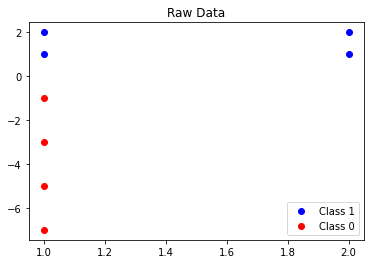

In [3]:
plt.title('Raw Data')
plt.scatter(data['X'][:4,0], data['X'][:4,1], c='blue', marker='o', label = 'Class 1')
plt.scatter(data['X'][-4:,0], data['X'][-4:,1], c='red', marker='o', label = 'Class 0')
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

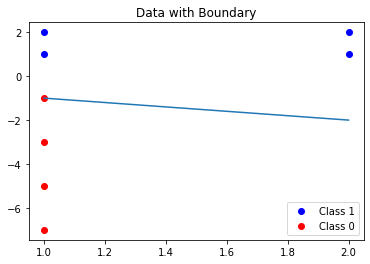

In [4]:
original_weight = np.array([0, -1, -1])
original_x_boundary = np.linspace(1, 2, 10)
original_y_boundary = (-original_weight[1]/original_weight[2])*original_x_boundary-(original_weight[0]/original_weight[2])

plt.title('Data with Boundary')
plt.scatter(data['X'][:4,0], data['X'][:4,1], c='blue', marker='o', label = 'Class 1')
plt.scatter(data['X'][-4:,0], data['X'][-4:,1], c='red', marker='o', label = 'Class 0')
plt.plot(original_x_boundary,original_y_boundary)
plt.legend()
plt.show

In [5]:
class Perceptron:
    
    def __init__(self, lr: float):
        """
        Constructor of the Perceptron class.
        
        Parameters
        ----------
        lr: float
            Learning rate for updating weights.
        
        """
        self.w = np.array([0, -1, -1], dtype=float) # weight vector  
        self.lr = lr
    
    def forward(self, x: np.ndarray) -> float:
        """
        Direct propagation of the perceptron with its activation function y = F (w ^ T x)
        
        Parameters
        ----------
        x: np.ndarray
            Input vector of length 2.
        
        Returns
        -------
        y: np.float
            Exit of the perceptron after the activation function.
        
        """
        
        net = self.net_function(x)
        y = self.sigmoid(net)
        
        return y
    
        
    def sigmoid(self, net : float) -> float:
        y = 1/(1+math.exp(-net))
        return y
    
    def net_function(self, x : np.ndarray) -> float:
        net = x[0]*self.w[1]+x[1]*self.w[2]+self.w[0]
        return net

In [6]:
ff_perceptron = Perceptron(lr=0.1)
y = []

for index in range(len(data['D'])):
    y.append(ff_perceptron.forward(data['X'][index]))
    loss = 1/2*(y[index] - float(data['D'][index]))**2
        
print("Loss : ", loss) # accuracy is in terms of loss or cost function

Loss :  0.4975304337760027


Feed Forward Weights:  [ 0. -1. -1.]


<function matplotlib.pyplot.show(*args, **kw)>

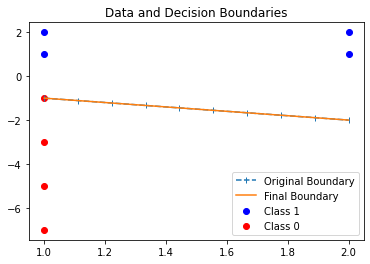

In [7]:
print("Feed Forward Weights: ", ff_perceptron.w)
y_new_boundary = (-ff_perceptron.w[1]/ff_perceptron.w[2])*original_x_boundary-(ff_perceptron.w[0]/ff_perceptron.w[2])

plt.title('Data and Decision Boundaries')
plt.scatter(data['X'][:4,0], data['X'][:4,1], c='blue', marker='o', label = 'Class 1')
plt.scatter(data['X'][-4:,0], data['X'][-4:,1], c='red', marker='o', label = 'Class 0')
plt.plot(original_x_boundary,original_y_boundary, label = 'Original Boundary', marker='|', linestyle='dashed')
plt.plot(original_x_boundary,y_new_boundary, label = 'Final Boundary')
plt.legend()
plt.show

In [8]:
class Perceptron:
       
    def __init__(self, lr: float):
        """
        Constructor of the Perceptron class.
        
        Parameters
        ----------
        lr: float
            Learning rate for updating weights.
        
        """
        self.w = np.array([0, -1, -1], dtype=float) # weight vector  
        self.lr = lr
    
    def forward(self, x: np.ndarray) -> float:
        """
        Direct propagation of the perceptron with its activation function y = F (w ^ T x) 
        
        Parameters
        ----------
        x: np.ndarray
            Input vector of length 2.
        
        Returns
        -------
        y: np.float
            Exit of the perceptron after the activation function.
        
        """
        
        net = self.net_function(x)
        y = self.sigmoid(net)
        
        return y        
    
    def update(self, x: np.ndarray, grad_output: float ) -> None:
        """
        Update weights w.
        
        Parameters
        ----------
        x: np.ndarray
            Input vector of length 2.
        grad_output: np.float
            Gradient of the error relative to the output y perceptron 
            grad_output = yi - di
            
        """ 
        # Update weight formula: 𝐰=𝐰−𝜂∇𝐰𝐸
        # ∇𝐰𝐸=(𝑦𝑖−𝑑𝑖)𝐹′(net𝑖)𝐱
        # 𝐹′(𝑥)=𝐹(𝑥)(1−𝐹(𝑥))
        # 𝐹(𝑥)=1/1+𝑒**(−𝑥)  
        # So, ∇𝐰𝐸=(𝑦𝑖−𝑑𝑖)𝐹((net𝑖)𝐱)(1−𝐹((net𝑖)𝐱))
        # and thus, 𝐰=𝐰−𝜂(𝑦𝑖−𝑑𝑖)𝐹((net𝑖)𝐱)(1−𝐹((net𝑖)𝐱))
        
        net = self.net_function(x)
        gradient = grad_output*self.sigmoid(net)*(1-self.sigmoid(net))
        for index in range(len(self.w)):
            self.w[index] = self.w[index] - self.lr*gradient 
            
        
    def sigmoid(self, net : float) -> float:
        y = 1/(1+math.exp(-net))
        return y
    
    def net_function(self, x : np.ndarray) -> float:
        net = x[0]*self.w[1]+x[1]*self.w[2]+self.w[0]
        return net

In [9]:
up_perceptron = Perceptron(lr=0.01)
y = []
loss = 0

for index in range(len(data['D'])):
    y.append(up_perceptron.forward(data['X'][index]))
    loss = 1/2*(y[index] - float(data['D'][index]))**2
    up_perceptron.update(data['X'][index], (y[index] - data['D'][index]))
    
        
print("Loss : ", loss) 

Loss :  0.49753517929604624


Updated Weights:  [-4.10670415e-04 -1.00041068e+00 -1.00041068e+00]


<function matplotlib.pyplot.show(*args, **kw)>

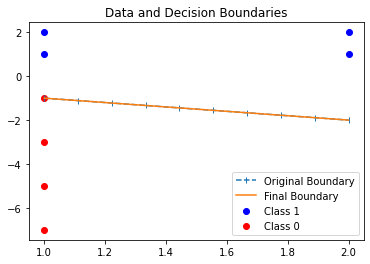

In [10]:
print("Updated Weights: ", up_perceptron.w)
y_new_boundary = (-up_perceptron.w[1]/up_perceptron.w[2])*original_x_boundary-(up_perceptron.w[0]/up_perceptron.w[2])

plt.title('Data and Decision Boundaries')
plt.scatter(data['X'][:4,0], data['X'][:4,1], c='blue', marker='o', label = 'Class 1')
plt.scatter(data['X'][-4:,0], data['X'][-4:,1], c='red', marker='o', label = 'Class 0')
plt.plot(original_x_boundary,original_y_boundary, label = 'Original Boundary', marker='|', linestyle='dashed')
plt.plot(original_x_boundary,y_new_boundary, label = 'Final Boundary')
plt.legend()
plt.show

In [11]:
up_perceptron = Perceptron(lr=0.01)
y = []
loss_all = []

for index in range(len(data['D'])):
    for epochs in range(100):
        y.append(up_perceptron.forward(data['X'][index]))
        up_perceptron.update(data['X'][index], (y[index] - data['D'][index])) 
        loss_all.append(1/2*(y[index] - float(data['D'][index]))**2)

print("Final Loss : ", loss_all[-1])

Final Loss :  0.007353237946721341


Final Weights:  [ 0.24592954 -0.7540713  -0.7540713 ]


<function matplotlib.pyplot.show(*args, **kw)>

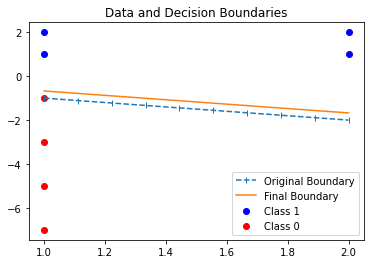

In [12]:
print("Final Weights: ", up_perceptron.w)
y_new_boundary = (-up_perceptron.w[1]/up_perceptron.w[2])*original_x_boundary-(up_perceptron.w[0]/up_perceptron.w[2])


plt.title('Data and Decision Boundaries')
plt.scatter(data['X'][:4,0], data['X'][:4,1], c='blue', marker='o', label = 'Class 1')
plt.scatter(data['X'][-4:,0], data['X'][-4:,1], c='red', marker='o', label = 'Class 0')
plt.plot(original_x_boundary,original_y_boundary, label = 'Original Boundary', marker='|', linestyle='dashed')
plt.plot(original_x_boundary,y_new_boundary, label = 'Final Boundary')
plt.legend()
plt.show